# With Markers

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done


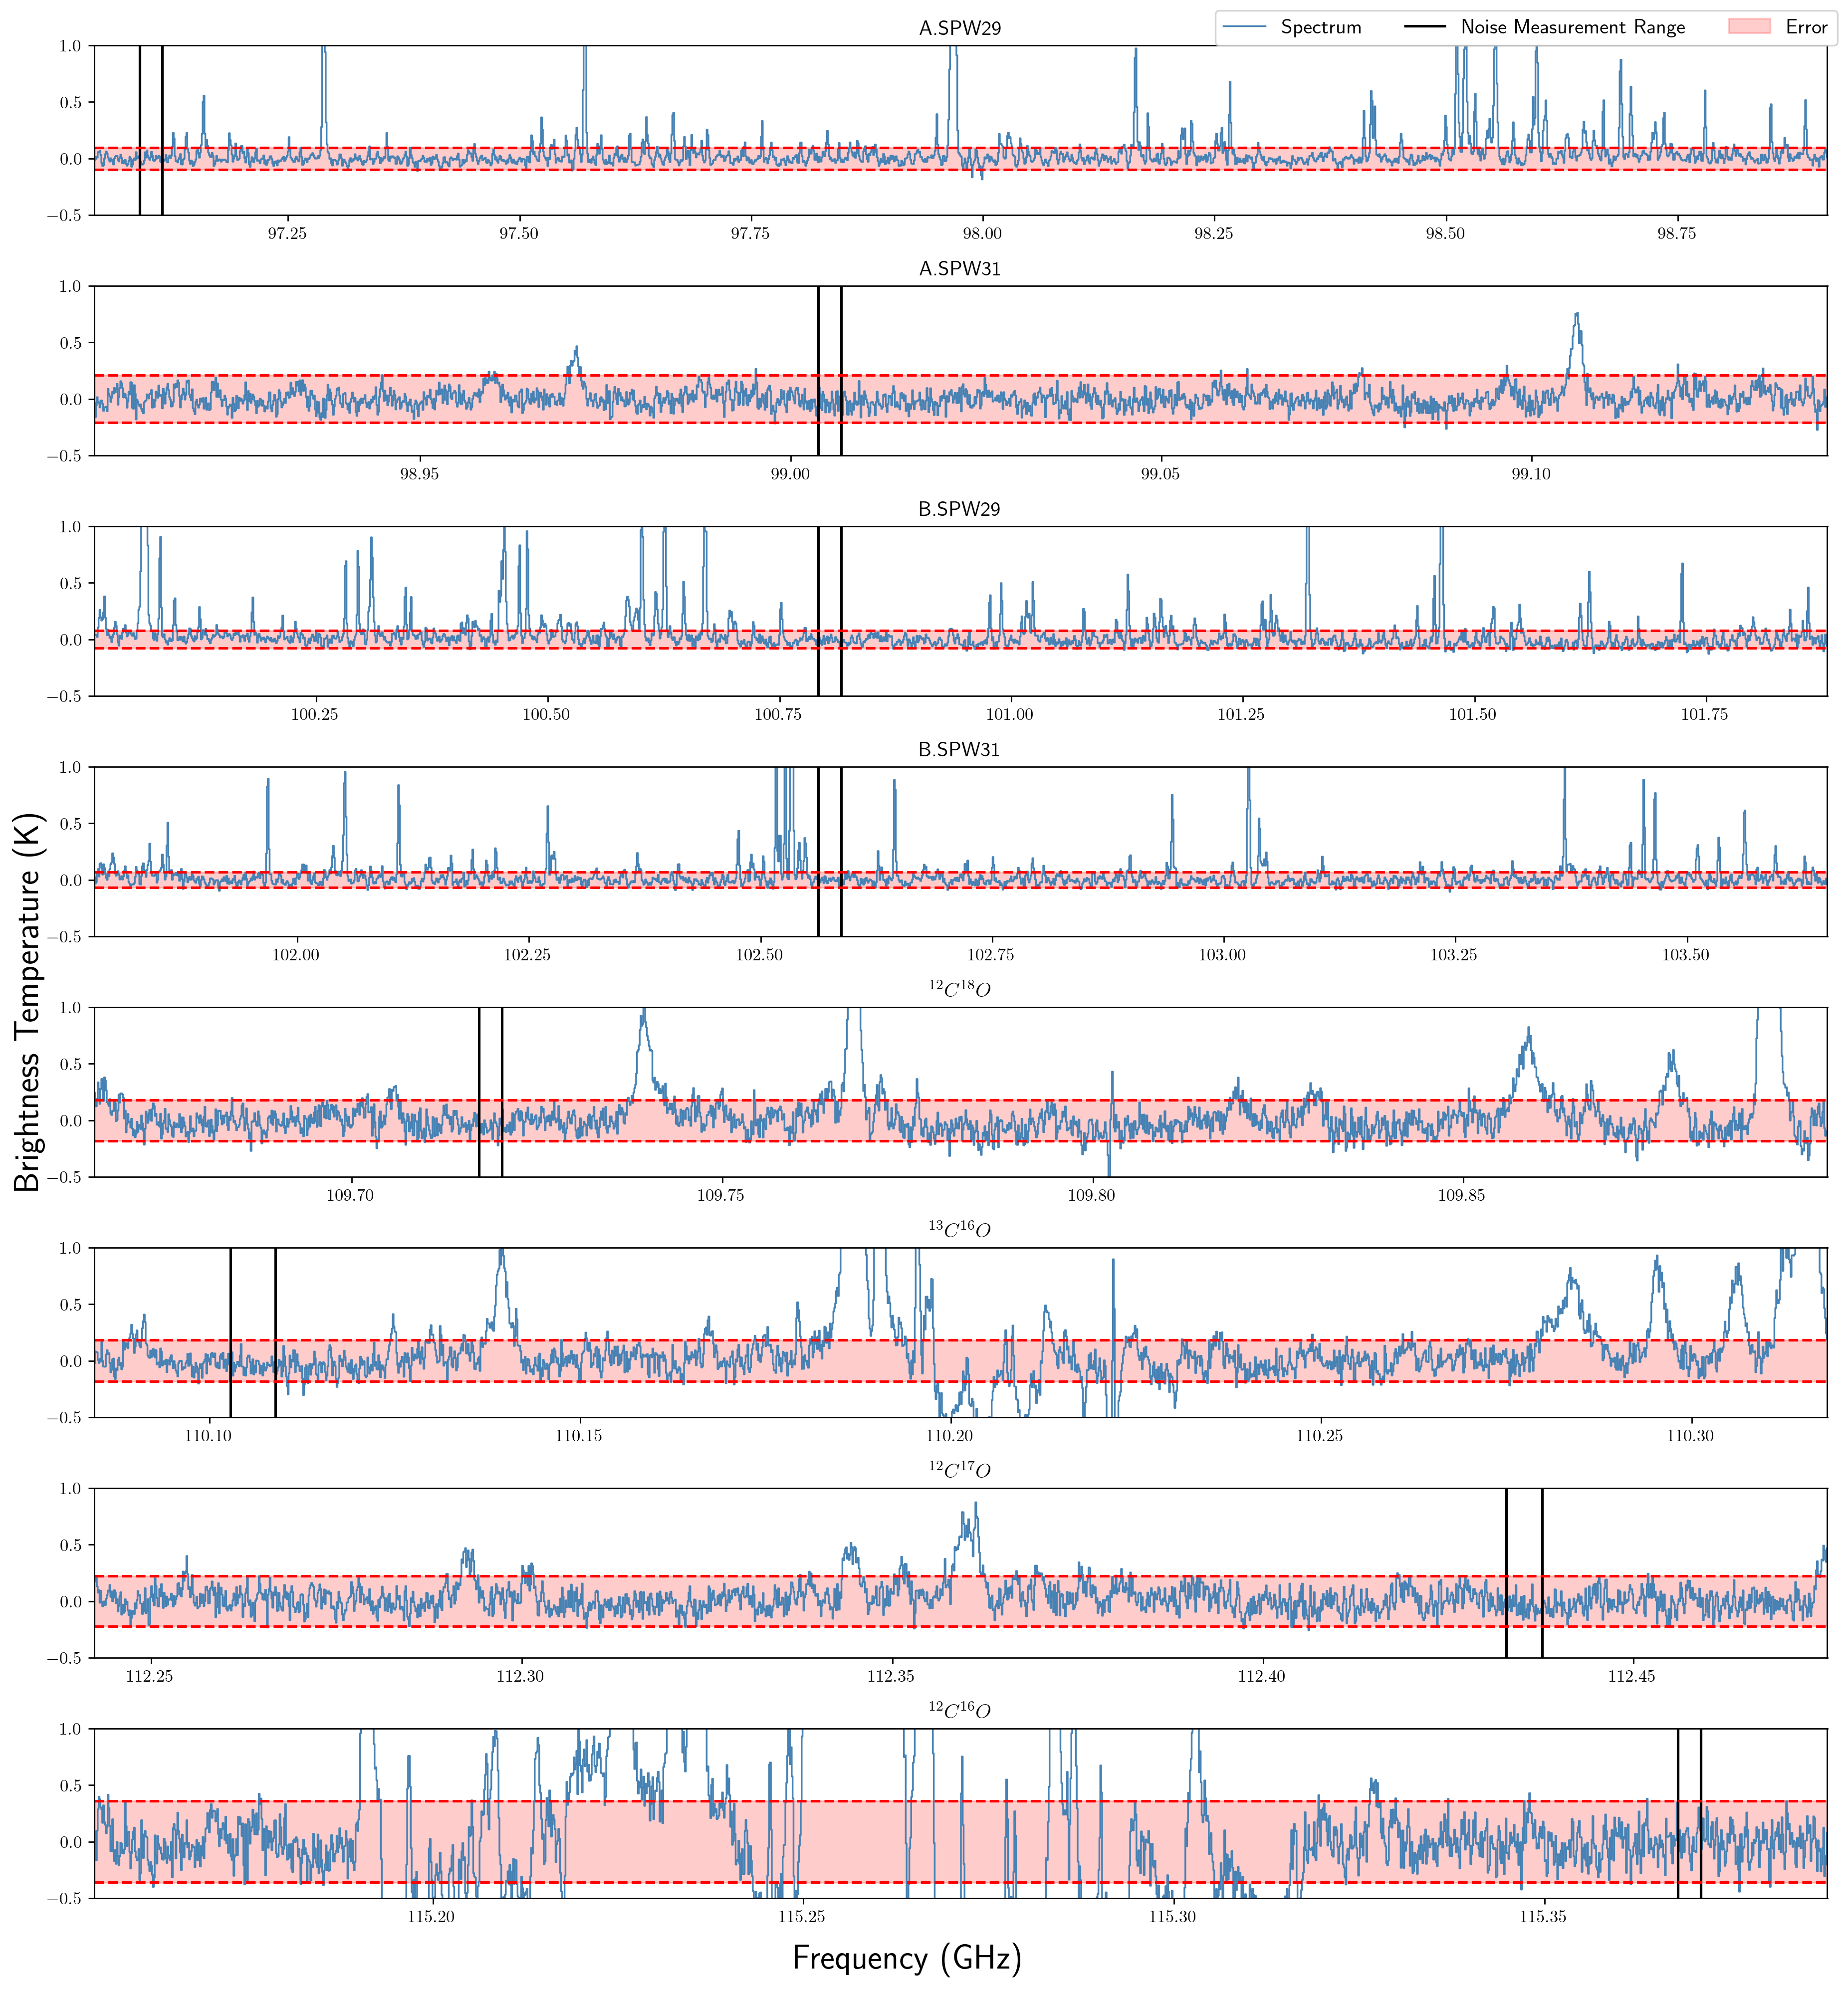

In [19]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import pyspeckit as psk
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#empty array with comments for each cube
'''
foo=[
, #A29
, #A31
, #B29
, #B31
, #12C18O
, #13C16O
, #12C17O
 #12C16O
'''

#all cubes in freq order
all_cubes=[
'A.Dust_Ridge_sci.spw29.cube.I.pbcor.fits', #A29
'A.Dust_Ridge_sci.spw31.cube.I.pbcor.fits', #A31
'B.Dust_Ridge_sci.spw29.cube.I.pbcor.fits', #B29
'B.Dust_Ridge_sci.spw31.cube.I.pbcor.fits', #B31
'A.Dust_Ridge_12C18O.cube.I.pbcor.fits', #12C18O
'A.Dust_Ridge_13C16O.cube.I.pbcor.fits', #13C16O
'B.Dust_Ridge_12C17O.cube.I.pbcor.fits', #12C17O
'B.Dust_Ridge_12C16O_1-0.cube.I.pbcor.fits' #12C16O
]


#where the noise is taken for each cube
Noise_measures=[
[50,75], #A29
[800,825], #A31
[800,825], #B29
[800,825], #B31
[425,450], #12C18O
[150,200], #13C16O
[1560,1600], #12C17O
[1750,1775] #12C16O
]

#name of each subplot
plot_title=[
"A.SPW29", #A29
"A.SPW31", #A31
"B.SPW29", #B29
"B.SPW31", #B31
r"${}^{12}C^{18}O$", #12C18O
r"${}^{13}C^{16}O$", #13C16O
r"${}^{12}C^{17}O$", #12C17O
r"${}^{12}C^{16}O$" #12C16O
]

#init the figure
fig1=pylab.figure(1,figsize=(15,16),dpi=250)

#finds coords of the core
center_path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
center_header=fits.getheader(center_path)
wcenter=WCS(center_header)
wcenter = wcenter.dropaxis(3)
wcenter = wcenter.dropaxis(2)
#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=wcenter.pixel_to_world(175,166)

#plots each cube
for i in range(len(all_cubes)):
    #plotting spectrum
    path=all_cubes[i]
    #find the corresponding pixel positions for those coords in new image
    header=fits.getheader(path)
    w2=WCS(header)
    image_coords=core_coords.to_pixel(w2,0,mode="wcs")
    #plots spectrum
    sc=SpectralCube.read(path)
    sc.allow_huge_operations=True 
    sc_Ghz=sc.with_spectral_unit(u.GHz)
    sc_Ghz=sc_Ghz.to(u.K)
    freq,Dec,Ra = sc_Ghz.world[:,0,0] 
    subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
    spectrum = np.average(subcube,axis=(1,2)) 
    ax1=pylab.subplot(8,1,i+1)
    if i==0:
        ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue",label="Spectrum")
    else:
        ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue",label="")
    pylab.ylim(-0.5,1)
    plt.rcParams['text.usetex'] = True
    
    #calculates noise
    Noise_upper=Noise_measures[i][1]
    Noise_lower=Noise_measures[i][0]
    width=freq[Noise_upper]-freq[Noise_lower]
    #lower line
    if i==0:
        pylab.vlines(freq[Noise_lower].value,-1,2,colors="black",label="Noise Measurement Range")
    else:
        pylab.vlines(freq[Noise_lower].value,-1,2,colors="black",label="")
    #upper line
    pylab.vlines(freq[Noise_upper].value,-1,2,colors="black")
    #calculate 3 sigma
    sigma=np.std(spectrum[Noise_lower:Noise_upper])
    three_sigma=3*sigma
    
    #plots pm three sigma
    pylab.hlines(three_sigma,freq[0].value,freq[1915].value,colors="red",ls="--" )
    pylab.hlines(-1*three_sigma,freq[0].value,freq[1915].value,colors="red",ls="--" )
    pylab.xlim(freq[0].value,freq[1915].value)
    if i==0:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="Error" )
    else:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="" )
    plt.title(plot_title[i])
    print(i,"done")

#adds labels
fig1.supylabel('Brightness Temperature (K)',fontsize=20)
fig1.supxlabel('Frequency (GHz)',fontsize=20)
plt.tight_layout()
fig1.legend( loc='upper right',ncol=3,fontsize=12)
plt.savefig("AllCOWithMarkers.png")
plt.savefig("AllCOWithMarkers.pdf")
#plt.savefig("spectra.pdf")

# Without Markers

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done


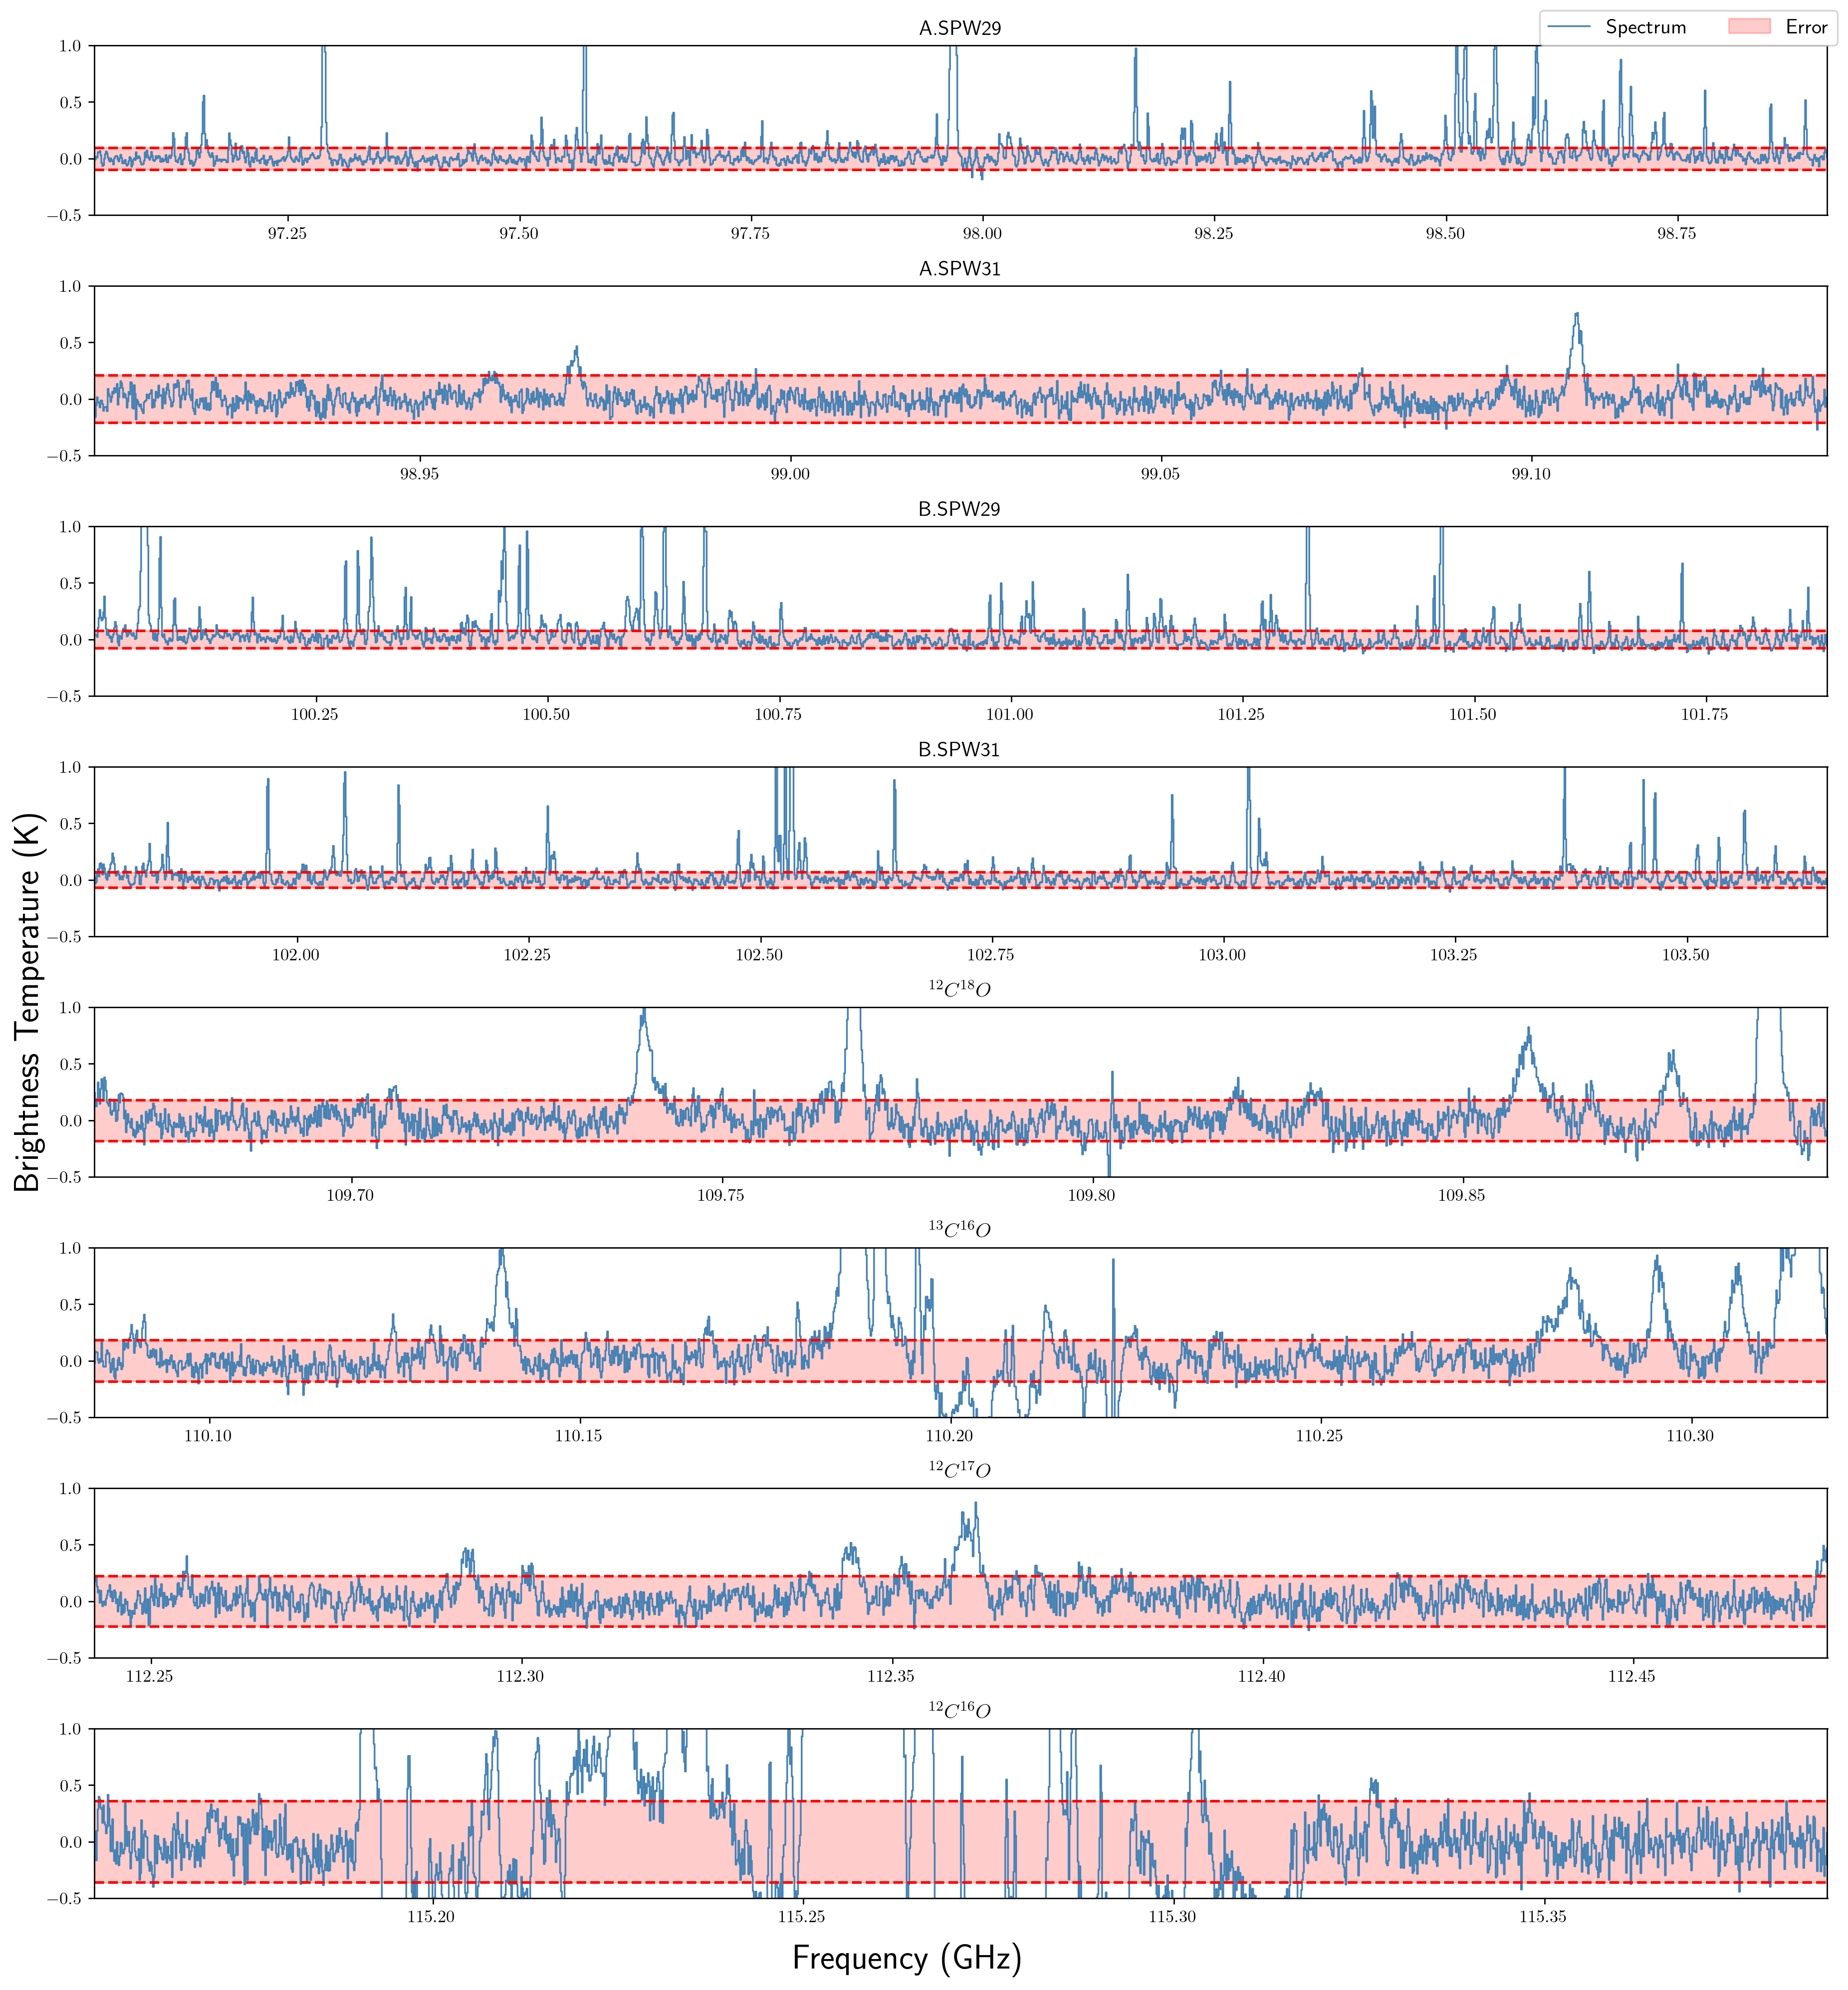

In [18]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import pyspeckit as psk
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#empty array with comments for each cube
'''
foo=[
, #A29
, #A31
, #B29
, #B31
, #12C18O
, #13C16O
, #12C17O
 #12C16O
'''

#all cubes in freq order
all_cubes=[
'A.Dust_Ridge_sci.spw29.cube.I.pbcor.fits', #A29
'A.Dust_Ridge_sci.spw31.cube.I.pbcor.fits', #A31
'B.Dust_Ridge_sci.spw29.cube.I.pbcor.fits', #B29
'B.Dust_Ridge_sci.spw31.cube.I.pbcor.fits', #B31
'A.Dust_Ridge_12C18O.cube.I.pbcor.fits', #12C18O
'A.Dust_Ridge_13C16O.cube.I.pbcor.fits', #13C16O
'B.Dust_Ridge_12C17O.cube.I.pbcor.fits', #12C17O
'B.Dust_Ridge_12C16O_1-0.cube.I.pbcor.fits' #12C16O
]


#where the noise is taken for each cube
Noise_measures=[
[50,75], #A29
[800,825], #A31
[800,825], #B29
[800,825], #B31
[425,450], #12C18O
[150,200], #13C16O
[1560,1600], #12C17O
[1750,1775] #12C16O
]

#name of each subplot
plot_title=[
"A.SPW29", #A29
"A.SPW31", #A31
"B.SPW29", #B29
"B.SPW31", #B31
r"${}^{12}C^{18}O$", #12C18O
r"${}^{13}C^{16}O$", #13C16O
r"${}^{12}C^{17}O$", #12C17O
r"${}^{12}C^{16}O$" #12C16O
]

#init the figure
fig1=pylab.figure(1,figsize=(15,16),dpi=250)

#finds coords of the core
center_path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
center_header=fits.getheader(center_path)
wcenter=WCS(center_header)
wcenter = wcenter.dropaxis(3)
wcenter = wcenter.dropaxis(2)
#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=wcenter.pixel_to_world(175,166)

#plots each cube
for i in range(len(all_cubes)):
    #plotting spectrum
    path=all_cubes[i]
    #find the corresponding pixel positions for those coords in new image
    header=fits.getheader(path)
    w2=WCS(header)
    image_coords=core_coords.to_pixel(w2,0,mode="wcs")
    #plots spectrum
    sc=SpectralCube.read(path)
    sc.allow_huge_operations=True 
    sc_Ghz=sc.with_spectral_unit(u.GHz)
    sc_Ghz=sc_Ghz.to(u.K)
    freq,Dec,Ra = sc_Ghz.world[:,0,0] 
    subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
    spectrum = np.average(subcube,axis=(1,2)) 
    ax1=pylab.subplot(8,1,i+1)
    if i==0:
        ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue",label="Spectrum")
    else:
        ax1.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue",label="")
    pylab.ylim(-0.5,1)
    plt.rcParams['text.usetex'] = True
    
    #calculates noise
    Noise_upper=Noise_measures[i][1]
    Noise_lower=Noise_measures[i][0]
    width=freq[Noise_upper]-freq[Noise_lower]
    #calculate 3 sigma
    sigma=np.std(spectrum[Noise_lower:Noise_upper])
    three_sigma=3*sigma
    
    #plots pm three sigma
    pylab.hlines(three_sigma,freq[0].value,freq[1915].value,colors="red",ls="--" )
    pylab.hlines(-1*three_sigma,freq[0].value,freq[1915].value,colors="red",ls="--" )
    pylab.xlim(freq[0].value,freq[1915].value)
    if i==0:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="Error" )
    else:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="" )
    plt.title(plot_title[i])
    print(i,"done")

#adds labels
fig1.supylabel('Brightness Temperature (K)',fontsize=20)
fig1.supxlabel('Frequency (GHz)',fontsize=20)
plt.tight_layout()
fig1.legend( loc='upper right',ncol=2,fontsize=12)
plt.savefig("AllCONoMarkers.png")
plt.savefig("AllCONoMarkers.pdf")
#plt.savefig("spectra.pdf")